In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("offenseTrain.csv")
df_test=pd.read_csv("offenseTest.csv")

In [3]:
df_train.shape,df_test.shape

((23856, 18), (15903, 17))

In [4]:
df_train.MULTIPLE_OFFENSE.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [5]:
## The above observation seems the data is not balanced 

In [6]:
df_train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [7]:
df_test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [8]:
## As we abserve one of the feature as missing values

In [9]:
## Lets combine the datas for EDA

In [10]:
data_com=pd.concat([df_train,df_test],axis=0)

In [11]:
data_com

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0.0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1.0
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1.0
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1.0
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,CR_44468,28-NOV-97,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43,NaN
15899,CR_158460,09-JUN-12,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34,NaN
15900,CR_115946,22-APR-06,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34,NaN
15901,CR_137663,03-APR-09,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34,NaN


In [12]:
## lets drop the incident id and data feature as it does make an impact on the dependent feature

In [13]:
data_com=data_com.drop(['INCIDENT_ID','DATE'],axis=1)

In [14]:
data_com

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0.0
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1.0
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1.0
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1.0
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43,NaN
15899,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34,NaN
15900,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34,NaN
15901,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34,NaN


In [15]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39759 entries, 0 to 15902
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X_1               39759 non-null  int64  
 1   X_2               39759 non-null  int64  
 2   X_3               39759 non-null  int64  
 3   X_4               39759 non-null  int64  
 4   X_5               39759 non-null  int64  
 5   X_6               39759 non-null  int64  
 6   X_7               39759 non-null  int64  
 7   X_8               39759 non-null  int64  
 8   X_9               39759 non-null  int64  
 9   X_10              39759 non-null  int64  
 10  X_11              39759 non-null  int64  
 11  X_12              39450 non-null  float64
 12  X_13              39759 non-null  int64  
 13  X_14              39759 non-null  int64  
 14  X_15              39759 non-null  int64  
 15  MULTIPLE_OFFENSE  23856 non-null  float64
dtypes: float64(2), int64(14)
memory usage: 5

In [16]:
## lets us try to visualize the data

In [17]:
##sns.pairplot(data_com,hue='MULTIPLE_OFFENSE')

In [18]:
import sweetviz

In [145]:
my_report1=sweetviz.analyze([df_train,"combine_data"],target_feat='MULTIPLE_OFFENSE')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [146]:
my_report1.show_html('Report1.html')

In [21]:
## From the above report we can able to view each features and how they are distributed and also general info.
##let us check coorelation within the features and independent features too

In [22]:
data_com.corr()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
X_1,1.000000,0.025367,0.025921,-0.000838,-0.036178,0.411515,0.423175,-0.064304,0.016480,-0.002099,-0.000198,-0.044330,0.107562,-0.008412,-0.015861,0.014034
X_2,0.025367,1.000000,0.996964,-0.104589,-0.355301,0.121420,0.062978,-0.043962,-0.021744,-0.019407,0.044672,-0.072450,0.045654,0.017121,0.011343,-0.027293
X_3,0.025921,0.996964,1.000000,-0.075775,-0.354199,0.126630,0.077534,-0.039670,-0.023360,-0.016925,0.043601,-0.069300,0.042729,0.015414,0.004556,-0.027218
X_4,-0.000838,-0.104589,-0.075775,1.000000,0.432723,0.025254,0.095280,0.068309,-0.019402,0.039108,-0.043236,0.061825,-0.050625,-0.026965,-0.035020,-0.002921
X_5,-0.036178,-0.355301,-0.354199,0.432723,1.000000,-0.065284,0.007755,0.053294,0.039692,0.051241,-0.050062,0.089636,-0.072517,-0.007364,-0.042278,-0.003450
X_6,0.411515,0.121420,0.126630,0.025254,-0.065284,1.000000,0.694366,-0.064553,0.082239,0.020245,-0.004530,-0.039531,0.048391,-0.012370,-0.010500,-0.007903
X_7,0.423175,0.062978,0.077534,0.095280,0.007755,0.694366,1.000000,-0.014504,0.013980,0.025876,-0.001751,-0.001806,0.009569,0.004807,-0.007396,-0.008036
X_8,-0.064304,-0.043962,-0.039670,0.068309,0.053294,-0.064553,-0.014504,1.000000,-0.097799,0.186953,-0.004766,0.247519,-0.050926,0.003306,0.018583,-0.033397
X_9,0.016480,-0.021744,-0.023360,-0.019402,0.039692,0.082239,0.013980,-0.097799,1.000000,0.006519,-0.005721,-0.002704,0.026356,-0.300348,0.002563,-0.000748
X_10,-0.002099,-0.019407,-0.016925,0.039108,0.051241,0.020245,0.025876,0.186953,0.006519,1.000000,-0.047291,0.842666,0.001750,-0.012405,-0.005880,-0.242596


In [23]:
## lets fill the mssing values then we can go head with the feature selection


C:\Users\venkatesh\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


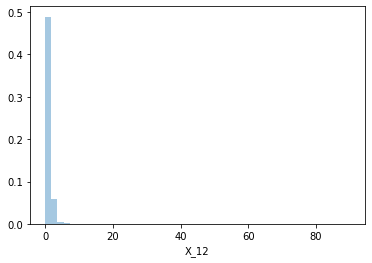

In [24]:
sns.distplot(data_com['X_12'])

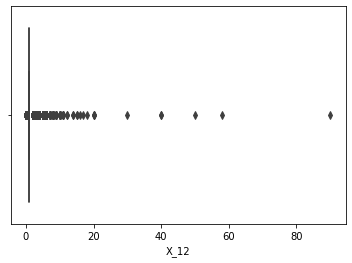

In [25]:
sns.boxplot(data_com['X_12'])

In [26]:
data_com.X_12.value_counts()

1.0     26204
0.0      8517
2.0      3420
3.0       797
4.0       276
5.0       101
6.0        59
8.0        18
7.0        14
10.0       11
9.0         9
11.0        6
20.0        3
12.0        2
14.0        2
40.0        2
15.0        2
90.0        1
18.0        1
16.0        1
58.0        1
50.0        1
17.0        1
30.0        1
Name: X_12, dtype: int64

In [27]:
data_com.X_12.unique()

array([ 1.,  0.,  3.,  2.,  6., 12.,  4., nan,  5., 11., 90., 20.,  8.,
       16., 30., 10.,  7., 50.,  9., 58., 14., 40., 15., 17., 18.])

In [28]:
## lets fill with most occrent value
data_com["X_12"]=data_com["X_12"].fillna(1)

In [29]:
data_com["X_12"].tail()

15898    0.0
15899    2.0
15900    1.0
15901    2.0
15902    1.0
Name: X_12, dtype: float64

In [30]:
data_com["X_12"]=data_com["X_12"].astype('int64')

In [31]:
data_com.isnull().sum()

X_1                     0
X_2                     0
X_3                     0
X_4                     0
X_5                     0
X_6                     0
X_7                     0
X_8                     0
X_9                     0
X_10                    0
X_11                    0
X_12                    0
X_13                    0
X_14                    0
X_15                    0
MULTIPLE_OFFENSE    15903
dtype: int64

In [32]:
data_com.X_12.head(10)

0    1
1    1
2    1
3    1
4    0
5    1
6    0
7    1
8    1
9    1
Name: X_12, dtype: int64

In [33]:
## Now lets concentrate on feature selction

In [34]:
from sklearn.feature_selection import SelectKBest

In [35]:
from sklearn.feature_selection import chi2

In [85]:
## To test to with statistical test we need dependent variable hence lets split the data
final_train=data_com.iloc[:23856,:]
final_test=data_com.iloc[23856:39760,:]  

In [86]:
final_train.shape,final_test.shape

((23856, 16), (15903, 16))

In [87]:
x1=final_train.iloc[:,0:15]
y1=final_train.iloc[:,-1]

In [88]:
x1

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0,112,29,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,47,48,7,3,15,10,1,5,1,174,0,98,29,34
23852,0,33,32,2,1,5,6,0,5,1,174,0,112,29,43
23853,0,25,25,9,0,3,5,1,6,1,174,0,10,29,18
23854,0,39,39,6,5,2,7,1,6,1,127,0,112,103,43


In [89]:
## apply k best class 
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x1,y1)

In [90]:
dfscores=pd.DataFrame(fit.scores_)

In [91]:
dfcolumns=pd.DataFrame(x1.columns)

In [92]:

cnct=pd.concat([dfcolumns,dfscores],axis=1,)
cnct.columns=(['features','score'])


In [93]:
cnct

,features,score
0,X_1,20.129959
1,X_2,166.484588
2,X_3,164.308071
3,X_4,0.412771
4,X_5,0.445567
5,X_6,4.841162
6,X_7,4.760170
7,X_8,57.775525
8,X_9,0.005039
9,X_10,1412.988215


In [94]:
cnct.sort_values(by=['score'])

,features,score
8,X_9,0.005039
3,X_4,0.412771
4,X_5,0.445567
6,X_7,4.760170
5,X_6,4.841162
12,X_13,9.037986
0,X_1,20.129959
7,X_8,57.775525
14,X_15,101.155023
13,X_14,143.417298


In [95]:
## As we observed the featues X_9,x_4,x_5 does not make any significant impact to the target variable.

In [96]:
##lets check featue important

In [97]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1,y1)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [98]:
feat=model.feature_importances_

In [99]:
feature_imp=pd.DataFrame(feat,index=x1.columns)

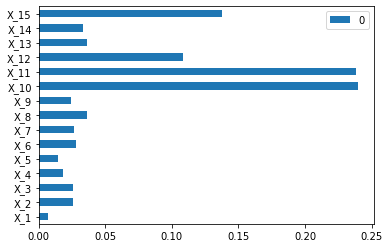

In [100]:
feature_imp.plot(kind="barh")
plt.show()


In [ ]:
## As observed here the three features mentioned above has less important and also x_1 seems less here

In [ ]:
## Lets observe from heatmap

In [101]:
d=final_train.corr()
corr_features=d.index


In [102]:
##g=sns.heatmap(x.corr(),annot=True)

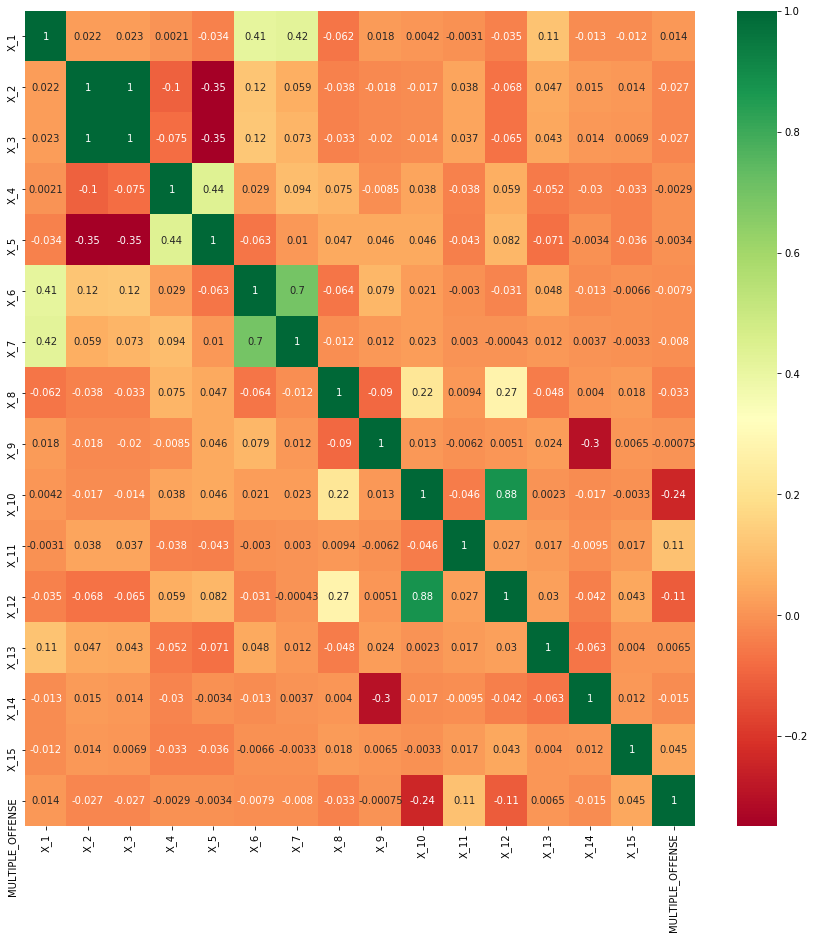

In [103]:
plt.figure(figsize = (15,15))

sns.heatmap(x.corr(),cmap="RdYlGn",annot=True)
plt.show()

In [ ]:
## As observed from above three tests we can drop X4,x5,x9,x7

In [104]:
final_train

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,2,1,5,6,1,6,1,174,1,92,29,36,0.0
1,1,37,37,0,0,11,17,1,6,1,236,1,103,142,34,1.0
2,0,3,2,3,5,1,0,2,3,1,174,1,110,93,34,1.0
3,0,33,32,2,1,7,1,1,6,1,249,1,72,29,34,1.0
4,0,33,32,2,1,8,3,0,5,1,174,0,112,29,43,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,47,48,7,3,15,10,1,5,1,174,0,98,29,34,1.0
23852,0,33,32,2,1,5,6,0,5,1,174,0,112,29,43,1.0
23853,0,25,25,9,0,3,5,1,6,1,174,0,10,29,18,1.0
23854,0,39,39,6,5,2,7,1,6,1,127,0,112,103,43,1.0


In [107]:
final_train=final_train.drop(['X_4','X_5','X_7','X_9'],axis=1)

In [108]:
final_train

,X_1,X_2,X_3,X_6,X_8,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,5,1,1,174,1,92,29,36,0.0
1,1,37,37,11,1,1,236,1,103,142,34,1.0
2,0,3,2,1,2,1,174,1,110,93,34,1.0
3,0,33,32,7,1,1,249,1,72,29,34,1.0
4,0,33,32,8,0,1,174,0,112,29,43,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,47,48,15,1,1,174,0,98,29,34,1.0
23852,0,33,32,5,0,1,174,0,112,29,43,1.0
23853,0,25,25,3,1,1,174,0,10,29,18,1.0
23854,0,39,39,2,1,1,127,0,112,103,43,1.0


In [111]:
final_test=final_test.drop(['X_4','X_5','X_7','X_9','MULTIPLE_OFFENSE'],axis=1)

In [112]:
final_test

,X_1,X_2,X_3,X_6,X_8,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,6,0,1,174,1,72,119,23
1,0,44,44,7,4,1,316,0,12,29,34
2,0,34,33,2,3,1,316,1,72,0,34
3,7,3,2,9,0,1,174,1,112,87,34
4,0,7,8,2,1,1,174,0,112,93,43
...,...,...,...,...,...,...,...,...,...,...,...
15898,1,22,22,15,0,1,174,0,72,29,43
15899,0,35,30,1,2,2,0,2,72,93,34
15900,0,26,27,6,2,1,0,1,72,62,34
15901,0,21,23,2,1,2,249,2,92,62,34


In [113]:
final_train.MULTIPLE_OFFENSE.value_counts()

1.0    22788
0.0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [ ]:
## As We can see on the above counts the data seems to be very imbalanced sets lets do some over sampling method

In [115]:
x=final_train.drop('MULTIPLE_OFFENSE',axis=1)
y=final_train['MULTIPLE_OFFENSE']

In [119]:
x.shape,y.shape

((23856, 11), (23856,))

In [116]:
from imblearn.over_sampling import SMOTE

In [117]:

smote=SMOTE()
x_res,y_res=smote.fit_sample(x,y)

In [118]:
x_res

,X_1,X_2,X_3,X_6,X_8,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,5,1,1,174,1,92,29,36
1,1,37,37,11,1,1,236,1,103,142,34
2,0,3,2,1,2,1,174,1,110,93,34
3,0,33,32,7,1,1,249,1,72,29,34
4,0,33,32,8,0,1,174,0,112,29,43
...,...,...,...,...,...,...,...,...,...,...,...
45571,0,36,35,11,0,2,128,0,18,133,46
45572,0,36,34,11,1,1,293,1,100,55,36
45573,0,24,25,2,2,2,41,1,107,10,34
45574,1,28,24,7,2,3,21,3,31,132,34


In [121]:
y_res.value_counts()

1.0    22788
0.0    22788
Name: MULTIPLE_OFFENSE, dtype: int64

In [ ]:
## Now the data seems balanced lets fit the model NOw am going with random forest initially. also since i have not standartize the scale we will go for random forest instead of knn or logistic regression

In [ ]:
##As we observed from the coorelation there not much linear relationships with dependent variable.

In [128]:
## lets the split the data for train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=0)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
y_pred
acc_randomforest = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_randomforest)



99.58


In [139]:
Re_random=recall_score(y_test,y_pred)

In [140]:
Re_random

0.9938025675077468

In [123]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(randomforest,x_res,y_res,cv=10)


In [124]:
score

array([0.99473453, 0.99670908, 0.99736727, 0.99780606, 0.99736727,
       0.99780606, 0.99868334, 0.99736669, 0.99714725, 0.99758613])

In [125]:
score.mean()

0.9972573669023725

In [ ]:
## Lets move with randomforest as it has good recall score.

In [151]:
final_prediction=randomforest.predict(final_test)

In [156]:
ids=df_test['INCIDENT_ID']

In [158]:
submission=pd.DataFrame({'INCIDENT_ID':ids,'MULTIPLE_OFFENSE':final_prediction})

In [160]:
submission.to_csv(r"C:\Users\venkatesh\submissionsfinal.csv",index="false")

In [ ]:
## With respect to EDA I have drop four feature which does not make any impact on the dependent feature and also i have done 
## over sampling to get data balanced and for model selection i have preferred random forest since i cant see much of
## linear relation ships with dependent variable hence i have preferred randomforest or knn to go with.